In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

import os
import sys
import itertools
import math
import logging
import json
import re
import random
import time
import concurrent.futures
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import imgaug
from imgaug import augmenters as iaa

# Root directory of the project
#!cp "drive/MyDrive/mrcnn"
#ROOT_DIR = os.getcwd()
#if ROOT_DIR.endswith("samples/nucleus"):
    # Go up two levels to the repo root
#    ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))
    
# Import Mask RCNN
#sys.path.append(ROOT_DIR)
#sys.path.append('/content/gdrive/Mask_RCNN-master/')
#!ls "/content/drive/My Drive/Mask_RCNN-master"
ROOT_DIR="/content/drive/My Drive/Mask_RCNN-master/"
#sys.path.append('/content/drive/My Drive/Mask_RCNN-master/')
sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model as modellib
from mrcnn.model import log

!cp "/content/drive/My Drive/Mask_RCNN-master/samples/smoke/smokev2.py" .
#!cp os.path.join(ROOT_DIR,"samples/smoke/smokev2.py") .
#!cp "/content/gdrive/Mask_RCNN-master/samples/smoke"
import smokev2

%matplotlib inline

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

# Results directory
# Save submission files here
RESULTS_DIR = os.path.join(ROOT_DIR, "results/smoke/")

In [ ]:
### TRAINING
#Configurations
config=smokev2.SmokeConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     6
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 6
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

In [ ]:
model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)

In [ ]:
#Get ImageNet weights
weights_path=model.get_imagenet_weights()
print("Loading weights from ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights from  /root/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5


In [ ]:
#Train the model
smokev2.train(model,os.path.join(ROOT_DIR,"nucelus-data"),"train",config)

The dataset we're reading from is /content/drive/My Drive/Mask_RCNN-master/nucelus-data/train
The dataset we're reading from is /content/drive/My Drive/Mask_RCNN-master/nucelus-data/val
Train network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/Mask_RCNN-master/logs/smoke20201005T0046/mask_rcnn_smoke_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrc

In [ ]:
#INFERENCE
config_inf=smokev2.SmokeInferenceConfig()
config_inf.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [ ]:
model_inf=modellib.MaskRCNN(mode="inference",config=config_inf,model_dir=DEFAULT_LOGS_DIR)

Instructions for updating:
Use fn_output_signature instead


In [ ]:
weights_path_inf=model_inf.find_last()
print("Loading weights from", weights_path)

Loading weights from /root/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5


In [ ]:
model_inf.load_weights(weights_path_inf,by_name=True)

Re-starting from epoch 20


Running on /content/drive/My Drive/Mask_RCNN-master/nucelus-data
The dataset we're reading from is /content/drive/My Drive/Mask_RCNN-master/nucelus-data/val


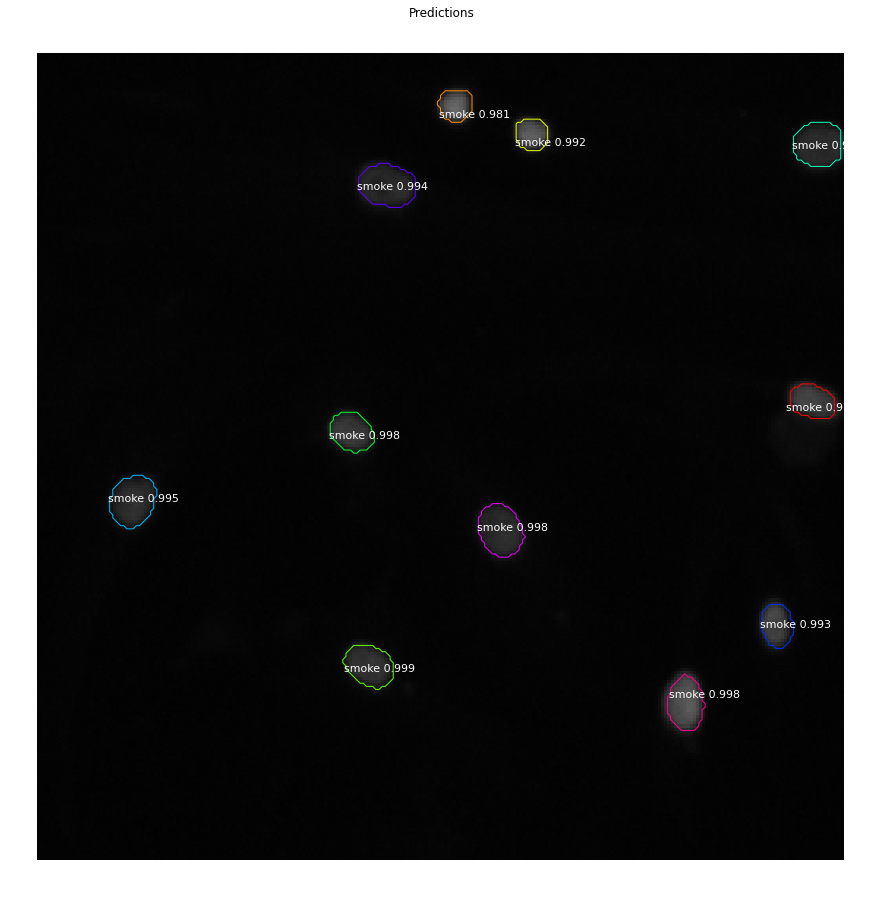

NameError: ignored

In [ ]:
smokev2.detect(model_inf,os.path.join(ROOT_DIR,"nucelus-data"),"val")

In [ ]:
#Smoke inference
config_smoke_inf=smokev2.SmokeInferenceConfig()
config_smoke_inf.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [ ]:
model_smoke_inf=modellib.MaskRCNN(mode="inference",config=config_smoke_inf,model_dir=DEFAULT_LOGS_DIR)

Instructions for updating:
Use fn_output_signature instead


In [ ]:
#weights_path_inf=model_smoke_inf.find_last()
print("Loading weights from", weights_path)
model_smoke_inf.load_weights(weights_path,by_name=True)

Loading weights from /root/.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5


Running on /content/drive/My Drive/Mask_RCNN-master/Smoke-Datav3
The dataset we're reading from is /content/drive/My Drive/Mask_RCNN-master/Smoke-Datav3/v1


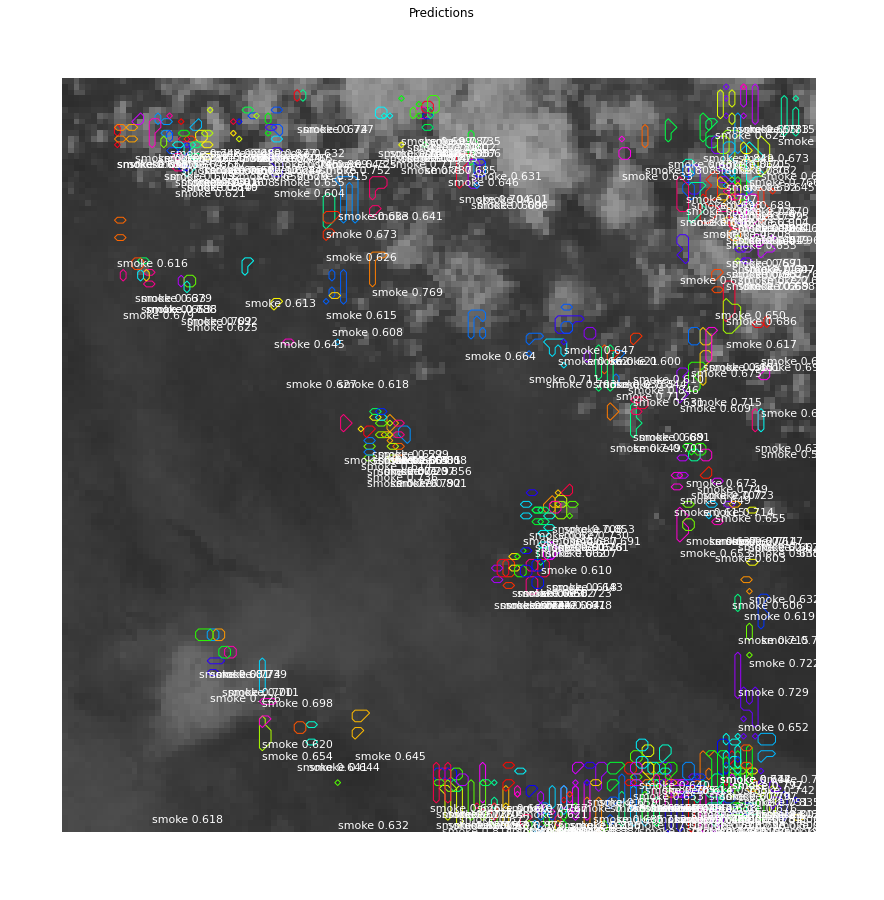

NameError: ignored

In [ ]:
smokev2.detect(model_smoke_inf,os.path.join(ROOT_DIR,"Smoke-Datav3"),"v1")